In [0]:
import networkx as nx 
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os

import warnings
warnings.filterwarnings('ignore')

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
#reading graph
if not os.path.isfile('train_woh.csv'):
    traincsv = pd.read_csv('train.csv')
    print(traincsv[traincsv.isna().any(1)])
    print(traincsv.info())
    print("Number of duplicate entries: ",sum(traincsv.duplicated()))
    traincsv.to_csv('train_woh.csv',header=False,index=False)
    print("saved the graph into file")
else:
    g=nx.read_edgelist('train_woh.csv',delimiter=',',create_using=nx.DiGraph(),nodetype=int)
    print(nx.info(g))

Name: 
Type: DiGraph
Number of nodes: 1862220
Number of edges: 9437519
Average in degree:   5.0679
Average out degree:   5.0679


#### Display the graph

Name: 
Type: DiGraph
Number of nodes: 66
Number of edges: 50
Average in degree:   0.7576
Average out degree:   0.7576


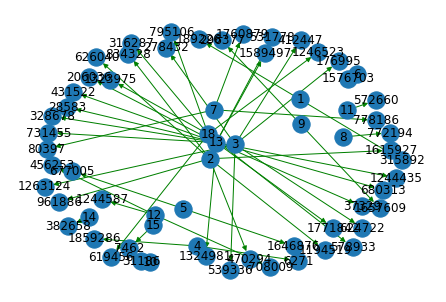

In [0]:
### we will only display a sample graph from the datasets
sub = pd.read_csv('train_woh.csv',nrows=50).to_csv('subdata.csv',header=False,index=False)
subgraph = nx.read_edgelist('subdata.csv',delimiter=',',create_using = nx.DiGraph(),nodetype=int)


pos = nx.spring_layout(subgraph)
nx.draw(subgraph,pos,edge_color='green',with_labels=True)
plt.savefig('sub_graph.pdf')
print(nx.info(subgraph))

### EDA

In [0]:
# no of unique nodes
print(f'No of unique node :{len(g.nodes())}')

No of unique node :1862220


Text(0, 0.5, 'no of followers')

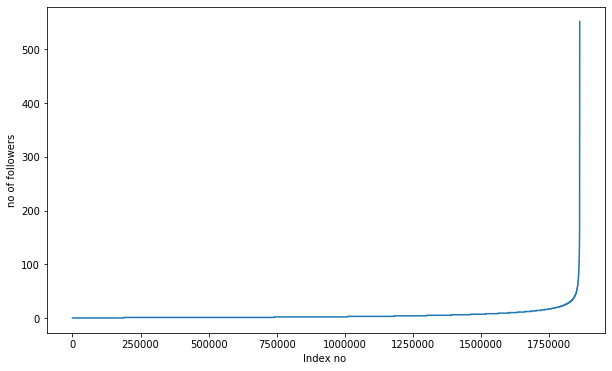

In [0]:
## No of followers of each person
followers = list(dict(g.in_degree()).values())
followers.sort()

plt.figure(figsize=(10,6))
plt.plot(followers)
plt.xlabel('Index no ')
plt.ylabel('no of followers')

Text(0, 0.5, 'no of followers')

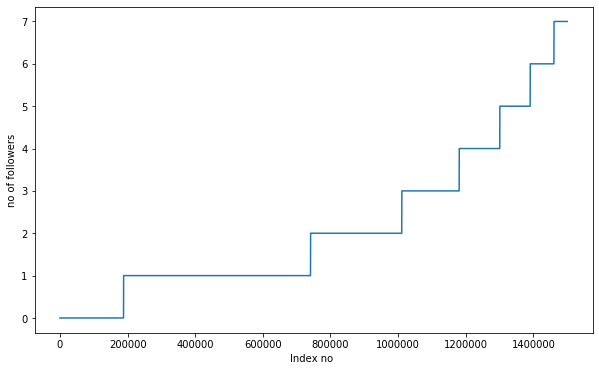

In [0]:
## No of followers of each person
followers = list(dict(g.in_degree()).values())
followers.sort()

plt.figure(figsize=(10,6))
plt.plot(followers[:1500000])
plt.xlabel('Index no ')
plt.ylabel('no of followers')

In [0]:
##90-100 percentile of followers
for i in range(0,11):
    print(f'{90+i} percentile vaues is {np.percentile(followers,90+i)}')

90 percentile vaues is 12.0
91 percentile vaues is 13.0
92 percentile vaues is 14.0
93 percentile vaues is 15.0
94 percentile vaues is 17.0
95 percentile vaues is 19.0
96 percentile vaues is 21.0
97 percentile vaues is 24.0
98 percentile vaues is 29.0
99 percentile vaues is 40.0
100 percentile vaues is 552.0


##### 99% user have less than 40 followers

In [0]:
for i in range(10,110,10):
    print(f'{99+(i/100)} percentile values is {np.percentile(followers,99+(i/100))}')

99.1 percentile values is 42.0
99.2 percentile values is 44.0
99.3 percentile values is 47.0
99.4 percentile values is 50.0
99.5 percentile values is 55.0
99.6 percentile values is 61.0
99.7 percentile values is 70.0
99.8 percentile values is 84.0
99.9 percentile values is 112.0
100.0 percentile values is 552.0


##### 99.9% user have less than 112 followers

Text(0, 0.5, 'no of following')

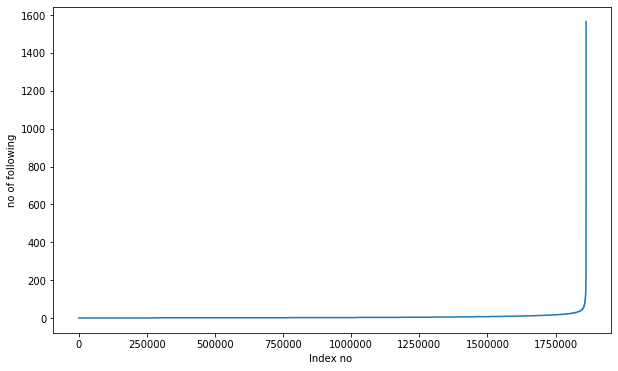

In [0]:
## no of  following of each person 
following = list(dict(g.out_degree()).values())
following.sort()

plt.figure(figsize=(10,6))
plt.plot(following)
plt.xlabel('Index no ')
plt.ylabel('no of following')

Text(0, 0.5, 'no of following')

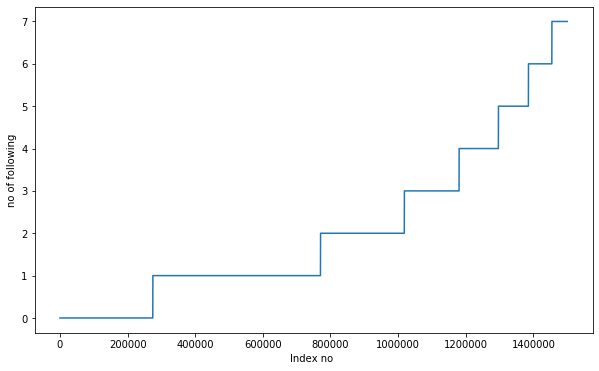

In [0]:
## no of  following of each person 
following = list(dict(g.out_degree()).values())
following.sort()

plt.figure(figsize=(10,6))
plt.plot(following[:1500000])
plt.xlabel('Index no ')
plt.ylabel('no of following')

In [0]:
##90-100 percentile of followers
for i in range(0,11):
    print(f'{90+i} percentile vaues is {np.percentile(following,90+i)}')

90 percentile vaues is 12.0
91 percentile vaues is 13.0
92 percentile vaues is 14.0
93 percentile vaues is 15.0
94 percentile vaues is 17.0
95 percentile vaues is 19.0
96 percentile vaues is 21.0
97 percentile vaues is 24.0
98 percentile vaues is 29.0
99 percentile vaues is 40.0
100 percentile vaues is 1566.0


In [0]:
for i in range(10,110,10):
    print(f'{99+(i/100)} percentile values is {np.percentile(followers,99+(i/100))}')

99.1 percentile values is 42.0
99.2 percentile values is 44.0
99.3 percentile values is 47.0
99.4 percentile values is 50.0
99.5 percentile values is 55.0
99.6 percentile values is 61.0
99.7 percentile values is 70.0
99.8 percentile values is 84.0
99.9 percentile values is 112.0
100.0 percentile values is 552.0


In [0]:
print(f'No of user those are not following anybody {sum(np.array(followers)==0)} and % is {sum(np.array(followers)==0)*100/len(followers)}')

No of user having 0 followers 188043 and % is 10.097786512871734


In [0]:
print(f'No of user having zero followers {sum(np.array(following)==0)} and % is {sum(np.array(following)==0)*100/len(following)}')

No of user having 0 following 274512 and % is 14.741115442858524


### Followers + Following

In [0]:
from collections import Counter

In = dict(g.in_degree())
out = dict(g.out_degree())

both = Counter(In)+Counter(out)
in_out_degree = np.array(list(both.values()))

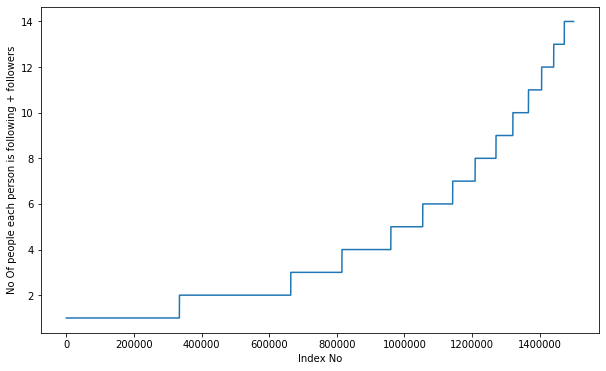

In [0]:
in_out_degree_sort = sorted(in_out_degree)
plt.figure(figsize=(10,6))
plt.plot(in_out_degree_sort[0:1500000])
plt.xlabel('Index No')
plt.ylabel('No Of people each person is following + followers')
plt.show()

In [0]:
print(f'{sum(in_out_degree==in_out_degree.min())} Persons having Minium no followers and following is {np.min(in_out_degree)}')

334291 Persons having Minium no followers and following is 1


In [0]:
print(f'{sum(in_out_degree==in_out_degree.max())} Persons having Maximum no followers and following is {np.max(in_out_degree)}')

1 Persons having Maximum no followers and following is 1579


## 2.1 Generating some edges which are not present in graph for supervised learning

Generated Bad links from graph which are not in graph and whose shortest path is greater than 2.

In [0]:
%%time
###generating bad edges from given graph
import random
import csv
import os
import pickle

if not os.path.isfile('missing_edges_final.p'):
    #getting all set of edges
    r = csv.reader(open('train_woh.csv','r'))
    edges = dict()
    for edge in r:
        edges[(edge[0], edge[1])] = 1
        
        
    missing_edges = set([])
    while (len(missing_edges)<9437519):
        a=random.randint(1, 1862220)
        b=random.randint(1, 1862220)
        tmp = edges.get((a,b),-1)
        if tmp == -1 and a!=b:
            try:
                if nx.shortest_path_length(g,source=a,target=b) > 2: 

                    missing_edges.add((a,b))
                else:
                    continue  
            except:  
                    missing_edges.add((a,b))              
        else:
            continue
    pickle.dump(missing_edges,open('missing_edges_final.p','wb'))
else:
    missing_edges = pickle.load(open('missing_edges_final.p','rb'))

CPU times: user 4.36 s, sys: 2.63 s, total: 6.99 s
Wall time: 16.5 s


In [0]:
import pickle
missing_edges = pickle.load(open('missing_edges_final.p','rb'))

## Train and Test split

In [0]:
df_pos = pd.read_csv('train.csv')
df_neg = pd.DataFrame(list(missing_edges),columns=['source_node','destination_node'])

print(f'Number of Nodes {df_pos.shape[0]}')
print(f'Number of Nodes {df_neg.shape[0]}')

Number of Nodes 9437519
Number of Nodes 9437519


In [0]:
from sklearn.model_selection import train_test_split
#Trian test split 
#Spiltted data into 80-20 
#positive links and negative links seperatly because we need positive training data only for creating graph 
#and for feature generation
X_train_pos, X_test_pos, y_train_pos, y_test_pos  = train_test_split(df_pos,np.ones(len(df_pos)),test_size=0.2, random_state=9)
X_train_neg, X_test_neg, y_train_neg, y_test_neg  = train_test_split(df_neg,np.zeros(len(df_neg)),test_size=0.2, random_state=9)

print(f'Number of Nodes in the Train(pos) {X_train_pos.shape,y_train_pos.shape}')
print(f'Number of Nodes in the Test(pos) {X_test_pos.shape,y_test_pos.shape}')
print('='*60)
print(f'Number of Nodes in the Train(neg) {X_train_neg.shape,y_train_neg.shape}')
print(f'Number of Nodes in the Train(neg) {X_test_neg.shape,y_test_neg.shape}')


Number of Nodes in the Train(pos) ((7550015, 2), (7550015,))
Number of Nodes in the Test(pos) ((1887504, 2), (1887504,))
Number of Nodes in the Train(neg) ((7550015, 2), (7550015,))
Number of Nodes in the Train(neg) ((1887504, 2), (1887504,))


In [0]:
# removing header and saving to csv

X_train_pos.to_csv('after eda/train_pos.csv',header=False,index=False)
X_test_pos.to_csv('after eda/test_pos.csv',header=False,index=False)

X_train_neg.to_csv('after eda/train_neg.csv',header=False,index=False)
X_test_neg.to_csv('after eda/test_neg.csv',header=False,index=False)

In [0]:
X_train_pos = pd.read_csv('after eda/train_pos.csv', names=['source_node', 'destination_node'])
X_test_pos = pd.read_csv('after eda/test_pos.csv', names=['source_node', 'destination_node'])
X_train_neg = pd.read_csv('after eda/train_neg.csv', names=['source_node', 'destination_node'])
X_test_neg = pd.read_csv('after eda/test_neg.csv', names=['source_node', 'destination_node'])

print('='*60)
print("Number of nodes in the train data graph with edges", X_train_pos.shape[0])
print("Number of nodes in the train data graph without edges", X_train_neg.shape[0])
print('='*60)
print("Number of nodes in the test data graph with edges", X_test_pos.shape[0])
print("Number of nodes in the test data graph without edges", X_test_neg.shape[0])

X_train = X_train_pos.append(X_train_neg,ignore_index=True)
y_train = np.concatenate((y_train_pos,y_train_neg))
X_test = X_test_pos.append(X_test_neg,ignore_index=True)
y_test = np.concatenate((y_test_pos,y_test_neg)) 
    
X_train.to_csv('after eda/train_after_eda.csv',header=False,index=False)
X_test.to_csv('after eda/test_after_eda.csv',header=False,index=False)
pd.DataFrame(y_train.astype(int)).to_csv('after eda/train_y.csv',header=False,index=False)
pd.DataFrame(y_test.astype(int)).to_csv('after eda/test_y.csv',header=False,index=False)

Number of nodes in the train data graph with edges 7550015
Number of nodes in the train data graph without edges 7550015
Number of nodes in the test data graph with edges 1887504
Number of nodes in the test data graph without edges 1887504


In [0]:
print(f'Final Train Nodes {X_train.shape[0]} and Label {y_train.shape[0]}')
print(f'Final Test Nodes {X_test.shape[0]} and Label {y_test.shape[0]}')

Final Train Nodes 15100030 and Label 15100030
Final Test Nodes 3775008 and Label 3775008
